In [1]:
import pandas as pd
import umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
import hdbscan

%matplotlib inline

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


In [3]:
final_df = pd.read_csv("../data/processed/final_df.csv")

In [4]:
final_df.isnull().sum()

id_student            0
age_band              0
gender                0
highest_education     0
n_assignments         0
mean_score           19
final_result          0
total_clicks          0
studied_credits       0
region                0
code_module           0
code_presentation     0
press_mod             0
dtype: int64

In [5]:
def drop_col (df, list):
    df.drop(columns=(list), inplace=True)
    return df

In [6]:
col_drop = ["press_mod", "code_presentation"]

In [7]:
drop_col(final_df, col_drop)

,id_student,age_band,gender,highest_education,n_assignments,mean_score,final_result,total_clicks,studied_credits,region,code_module
0,11391,55<=,M,HE Qualification,5,82.000000,Pass,934,240,East Anglian Region,AAA
1,28400,35-55,F,HE Qualification,5,66.400000,Pass,1435,60,Scotland,AAA
2,31604,35-55,F,A Level or Equivalent,5,76.000000,Pass,2158,60,South East Region,AAA
3,32885,0-35,F,Lower Than A Level,5,54.400000,Pass,1034,60,West Midlands Region,AAA
4,38053,35-55,M,A Level or Equivalent,5,68.000000,Pass,2445,60,Wales,AAA
...,...,...,...,...,...,...,...,...,...,...,...
26716,2620947,0-35,F,A Level or Equivalent,9,88.888889,Distinction,476,30,Scotland,GGG
26717,2645731,35-55,F,Lower Than A Level,9,88.111111,Distinction,893,30,East Anglian Region,GGG
26718,2648187,0-35,F,A Level or Equivalent,9,76.666667,Pass,312,30,South Region,GGG
26719,2679821,35-55,F,Lower Than A Level,2,91.500000,Withdrawn,275,30,South East Region,GGG


In [8]:
final_df.set_index(['id_student'], inplace=True)

In [9]:
final_df[final_df.isnull().any(axis=1)]

,age_band,gender,highest_education,n_assignments,mean_score,final_result,total_clicks,studied_credits,region,code_module
id_student,,,,,,,,,,
186780,35-55,F,A Level or Equivalent,0,NaN,Withdrawn,30,120,North Western Region,BBB
549713,35-55,F,Lower Than A Level,0,NaN,Withdrawn,75,60,West Midlands Region,BBB
554393,35-55,M,A Level or Equivalent,0,NaN,Fail,21,60,West Midlands Region,BBB
606501,0-35,F,A Level or Equivalent,0,NaN,Withdrawn,9,120,West Midlands Region,BBB
654422,0-35,F,No Formal quals,0,NaN,Withdrawn,31,60,East Midlands Region,BBB
555297,0-35,M,Lower Than A Level,0,NaN,Withdrawn,155,60,North Western Region,DDD
557247,0-35,F,A Level or Equivalent,0,NaN,Withdrawn,576,60,Yorkshire Region,DDD
557247,0-35,F,A Level or Equivalent,0,NaN,Withdrawn,576,60,Yorkshire Region,DDD
427248,35-55,F,A Level or Equivalent,0,NaN,Withdrawn,317,120,North Western Region,DDD


In [10]:
final_df['n_assignments'] = np.where((final_df.n_assignments == 0), 7, final_df.n_assignments)

In [11]:
final_df['mean_score'] = np.where((final_df.mean_score == 0), 72.83, final_df.mean_score)

In [12]:
final_df["mean_score"].fillna(72.83, inplace = True)

In [13]:
final_df['clicks_per_asmt'] = final_df['total_clicks']/final_df['n_assignments']

In [14]:
final_df.describe()

,n_assignments,mean_score,total_clicks,studied_credits,clicks_per_asmt
count,26721.000000,26721.000000,26721.000000,26721.000000,26721.000000
mean,7.752292,72.925100,1792.429812,77.769357,241.960057
std,4.537417,15.348637,2094.342100,39.026739,239.521776
min,1.000000,1.000000,1.000000,30.000000,0.272727
25%,4.000000,64.888889,460.000000,60.000000,87.000000
50%,7.000000,75.714286,1082.000000,60.000000,175.500000
75%,11.000000,84.047619,2383.000000,90.000000,318.000000
max,28.000000,100.000000,28615.000000,630.000000,4108.000000


In [15]:
clustering_df = pd.DataFrame(data=final_df, columns=["n_assignments", "clicks_per_asmt","studied_credits", "mean_score"])

# Scaling

In [16]:

FEATS = ['n_assignments','clicks_per_asmt', 'studied_credits', 'mean_score']

In [17]:
transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), 
                ('scaler', StandardScaler())])

In [18]:
preprocessor = \
ColumnTransformer(transformers=[('num', transformer, FEATS)])

In [19]:
preprocessor

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0)),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                             

In [20]:
clustering_1 = pd.DataFrame(data=preprocessor.fit_transform(final_df))

In [21]:
clustering_1

,0,1,2,3
0,-0.606588,-0.230297,4.156988,0.591262
1,-0.606588,0.188045,-0.455321,-0.425134
2,-0.606588,0.791759,-0.455321,0.200341
3,-0.606588,-0.146795,-0.455321,-1.206977
4,-0.606588,1.031408,-0.455321,-0.320888
...,...,...,...,...
26716,0.274987,-0.789384,-1.224039,1.040098
26717,0.274987,-0.595940,-1.224039,0.989423
26718,0.274987,-0.865463,-1.224039,0.243776
26719,-1.267770,-0.436127,-1.224039,1.210221


# UMAP

In [22]:
clustering_1 = clustering_1.to_numpy()

In [23]:
reducer_1 = umap.UMAP(random_state=42, metric='cosine', output_metric='euclidean')
reducer_1.fit(clustering_1.data)

UMAP(a=None, angular_rp_forest=True, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='cosine',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [24]:
embedding_1 = reducer_1.transform(clustering_1.data)

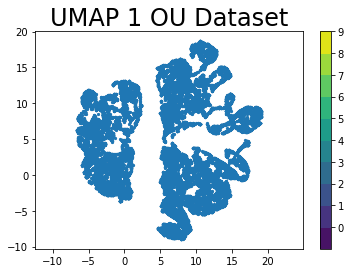

In [25]:
plt.scatter(embedding_1[:, 0], embedding_1[:, 1], cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-1).set_ticks(np.arange(11))
plt.title('UMAP 1 OU Dataset', fontsize=24);

In [26]:
clustering_1 = hdbscan.HDBSCAN(min_cluster_size=600, min_samples=4)

clustering_1.fit(embedding_1)

clustering_1

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=600, min_samples=4, p=None,
        prediction_data=False)

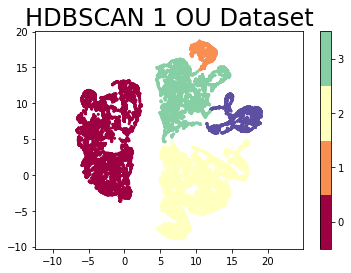

In [27]:
plt.scatter(embedding_1[:, 0], embedding_1[:, 1], c=clustering_1.labels_, cmap='Spectral', s=4)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(np.unique(clustering_1.labels_)))-0.5).set_ticks(np.arange(len(np.unique(clustering_1.labels_))))
plt.title('HDBSCAN 1 OU Dataset', fontsize=24);

In [28]:
final_df['cluster']=clustering_1.labels_

In [29]:
final_df.to_csv("../data/processed/five_clusters.csv")

In [30]:
from sklearn.metrics  import silhouette_score

In [31]:
import sklearn

In [32]:
sklearn.metrics.silhouette_score(embedding_1, clustering_1.labels_, metric='euclidean', sample_size=None, random_state=None)

0.41740334